In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import gamma

In [11]:
# concerned about 1d assignment with c(u,v) = |u-v|

def sample_unif_spacing(n):
    '''consider 2n points uniformly spaced on [0,1] line: exactly n of each type
       returns a uniform random sample of this setup'''
    
    points = np.linspace(0.,1.,2*n)
    
    colors = -1.*np.ones((2*n,1))
    s = np.random.choice(range(2*n), n, replace=False)
    colors[s] = 1.
    
    return colors, points

def comp_cost_crossing(colors, points):
    '''consider matching using identity permutation, compute cost of this matching'''

    n = int(len(points))/2
    x = np.where(colors == 1.)[0]
    y = np.where(colors == -1.)[0]
    
    S = 0.
    for k in range(n):
        u = x[k]
        v = y[k]
        S += np.abs(points[u]-points[v])
        
    return S

def comp_cost_noncrossing(colors, points):
    '''consider the matching that gives rise to the brownian bridge interpretation (view matching as a stack)
       compute the cost of this matching'''

    n = int(len(points))/2
    # unmatched stacks
    un_1 = []
    un_0 = []
    S = 0.
    for k in range(2*n):
        c = colors[k]
        if c == 1.:
            if len(un_0) > 0:
                j = un_0.pop()
                S += np.abs(points[k]-points[j])
            else:
                un_1.append(k)
        elif c == -1.:
            if len(un_1) > 0:
                j = un_1.pop()
                S += np.abs(points[k]-points[j])
            else:
                un_0.append(k)
                
    return S

def convert_bbridge(colors, points):
    '''convert the non-crossing matching from input to the a brownian bridge sequence'''
    
    n = int(len(points))/2
    bb = [0.]*(2*n+1)
    
    S = 0.
    for k in range(2*n):
        S += float(colors[k])
        bb[k+1] = S
        
    return bb

def plot_bbridge(colors, points):
    '''visualize the brownian bridge interpretation'''
    
    bb = convert_bbridge(colors, points)
    
    r = np.where(colors == 1.)[0]
    b = np.where(colors == -1.)[0]
    
    h = points[1]-points[0]
    
    plt.plot(points[r], [0.]*n, 'ro')
    plt.plot(points[b], [0.]*n, 'bo')
    plt.plot(np.append([-1.*h], points), bb, 'k')
    plt.xlim([-1.*h, 1.])
    plt.show()
    

1.6923076923076916
1.6923076923076916


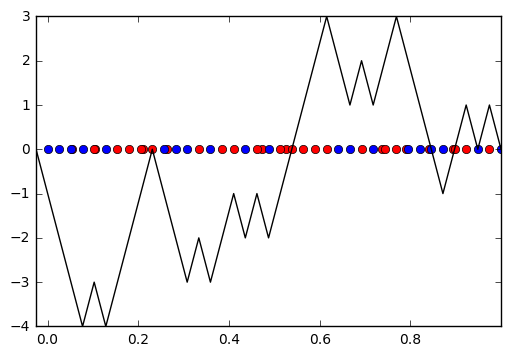

In [12]:
n = 20

colors, points = sample_unif_spacing(n)
#print colors

print comp_cost_crossing(colors, points)
print comp_cost_noncrossing(colors, points)

#print convert_bbridge(colors, points)

plot_bbridge(colors, points)

In [13]:
n = 10

colors, points = sample_unif_spacing(n)

r = np.where(colors == 1.)[0]
b = np.where(colors == 0.)[0]

plt.plot(points[r], [0.]*n, 'ro')
plt.plot(points[b], [0.]*n, 'bo')
plt.show()

ValueError: x and y must have same first dimension

power
0.4680944225535456
factor
0.505843053439


/home/naskoch/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


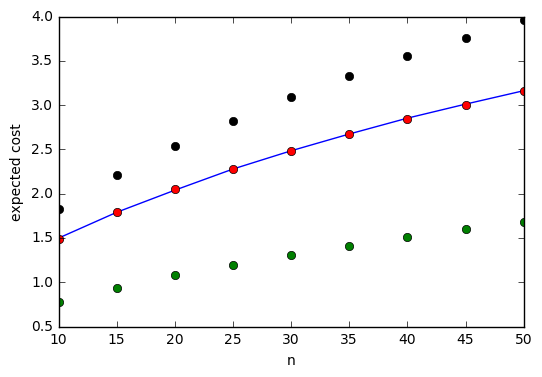

power
0.4818061909456491
factor
0.600325092264


/home/naskoch/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:43: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [61]:
# check asymptotic cost

#ns = [10, 100, 200, 500, 1000, 2000, 5000, 10000]

ns = [10, 15, 20, 25, 30, 35, 40, 45, 50]

costs = [0.]*len(ns)
trials = 50000

for k in range(len(ns)):
    S = 0.
    n = ns[k]
    for j in range(trials):
        colors, points = sample_unif_spacing(n)
        S += comp_cost_crossing(colors, points)
        
    costs[k] = S/float(trials)
    
plt.plot(ns, costs)

A = np.vstack([np.log(ns), np.ones(len(ns))]).T
b, a = np.linalg.lstsq(A, np.log(np.array(costs)))[0]

print 'power'
print b
print 'factor'
print math.exp(a)

ests = [1./(2.*n-1.)*sum([k**(1./2.) for k in range(2*n+1)]) - 1./(2.*n-1.)/math.sqrt(2.*n) * sum([k for k in range(2*n+1)]) for n in ns]

ests2 = [1./(2.*n-1.)* sum([math.sqrt(k*(2.*n-k)/(2.*n)) for k in range(2*n+1)]) for n in ns]

plt.plot(ns,[math.exp(a)*(n**b) for n in ns], 'ro')
plt.plot(ns, ests, 'go')
plt.plot(ns, ests2, 'ko')
plt.xlabel('n')
plt.ylabel('expected cost')
plt.show()

# check fit from ests2

A = np.vstack([np.log(ns), np.ones(len(ns))]).T
b, a = np.linalg.lstsq(A, np.log(np.array(ests2)))[0]

print 'power'
print b
print 'factor'
print math.exp(a)

In [67]:
# Let X_1, X_2,..., X_{2n+1} be a BB sequence on [0,1] with spacing h - confirming cost of matching is \sum_{i=1}^{2n+1} |X_i|h

def comp_cost_from_bb(bb, h):
    '''bb is a brownian bridge sequence on [0,1] with uniform spacing h
       compute the cost of the min matching from the bb coming from the matching'''
    
    c = sum([np.abs(b)*h for b in bb])
    
    return c

n = 20

colors, points = sample_unif_spacing(n)
#print colors

print comp_cost_crossing(colors, points)
print comp_cost_noncrossing(colors, points)

bb = convert_bbridge(colors, points)
h = points[1]-points[0]
print comp_cost_from_bb(bb, h)

1.4871794871794872
1.4871794871794872
1.4871794871794866


In [68]:
print h
print 1./(2*n-1)

print sum([math.sqrt(k*(2.*n-k)/(2.*n)) for k in range(2*n+1)])*h

0.02564102564102564
0.025641025641
2.5366857948385984


In [69]:
cst = sum([k*n/(2.*n-k)*np.prod([float(n-i)/(2.*n-i) for i in range(1,k)]) for k in range(1,n+1)])

print n*cst*h

0.9768009768009768


In [94]:
def f(j,x):
    '''f(j,x) = E(\sum_{i=1}^{2j} |x+\sum_{k=1}^i Z_i|)
       where Z_1,Z_2,... is a standard RW'''
    
    if j == 1:
        return 0.5*np.abs(x)+0.25*np.abs(x-2.)+0.25*np.abs(x+2.)+0.5*(np.abs(x+1.)+np.abs(x-1.))
    else:
        return 0.5*np.abs(x)+0.25*(np.abs(x+1.)+np.abs(x-1.))+0.5*f(j-1,x)+0.25*(np.abs(x+1.)+np.abs(x+2.)+f(j-1,x+2))+0.25*(np.abs(x-1.)+np.abs(x-2.)+f(j-1,x-2))

    
def comp_RW_abs_sum(n):
    Z = np.random.choice([1.,-1.], size=2*n)
    
    Y = [np.abs(sum(Z[:i])) for i in range(1,2*n+1)]
    
    return sum(Y)

n = 10
print f(n,0)

trials = 10000
S = 0.
for k in range(trials):
    S += comp_RW_abs_sum(n)
    
print S/trials

49.335174560546875
49.2786


In [97]:
n = 10
h = 1./(2.*n-1)
print h*f(n,0)-h*sum([k/(2.*n)*math.sqrt(2.*n) for k in range(1,2*n+1)])

0.12514458068691026
